<a href="https://colab.research.google.com/github/Ishita1302/Chatbot-using-NLP/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow


In [13]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [14]:
## Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
## Here exited is the dependent feature and all other are independent
## 1. Divide the datset into independant and dependant feature

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]
y.head()



0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [18]:
gender = pd.get_dummies(X['Gender'], drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [19]:
## Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [20]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
## Splitting the datasetinto training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [22]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape

(8000, 8)

In [25]:
X_test.shape

(2000, 8)

In [27]:
## PART 2

###CREATE ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [28]:
## Initialize ANN
classifier = Sequential()

In [29]:
## Adding Input Layer

classifier.add(Dense(units=11,activation='relu'))

In [30]:
## Adding 1st Hidden Layer

classifier.add(Dense(units=7,activation='relu'))

In [31]:
## Adding 2nd Hidden Layer

classifier.add(Dense(units=6,activation='relu'))

In [32]:
## Adding Output Layer

classifier.add(Dense(1,activation='sigmoid'))

In [35]:
##  Compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.1)

In [37]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4873 - accuracy: 0.7940 - val_loss: 0.4490 - val_accuracy: 0.8145
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4228 - accuracy: 0.8222 - val_loss: 0.4199 - val_accuracy: 0.8266
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3958 - accuracy: 0.8375 - val_loss: 0.4038 - val_accuracy: 0.8372
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3781 - accuracy: 0.8515 - val_loss: 0.3913 - val_accuracy: 0.8387
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3685 - accuracy: 0.8530 - val_loss: 0.3862 - val_accuracy: 0.8432
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3625 - accuracy: 0.8541 - val_loss: 0.3827 - val_accuracy: 0.8410
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3584 - accuracy: 0.8550 - val_loss: 0.3773 - val_accuracy:

KeyboardInterrupt: 

In [40]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [41]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.8617 - val_loss: 0.3703 - val_accuracy: 0.8493
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3359 - accuracy: 0.8632 - val_loss: 0.3702 - val_accuracy: 0.8466
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3354 - accuracy: 0.8608 - val_loss: 0.3722 - val_accuracy: 0.8463
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3355 - accuracy: 0.8612 - val_loss: 0.3725 - val_accuracy: 0.8463
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3363 - accuracy: 0.8636 - val_loss: 0.3695 - val_accuracy: 0.8455
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3356 - accuracy: 0.8619 - val_loss: 0.3703 - val_accuracy: 0.8459
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3348 - accuracy: 0.8615 - val_loss: 0.3694 - val_accuracy:

In [42]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

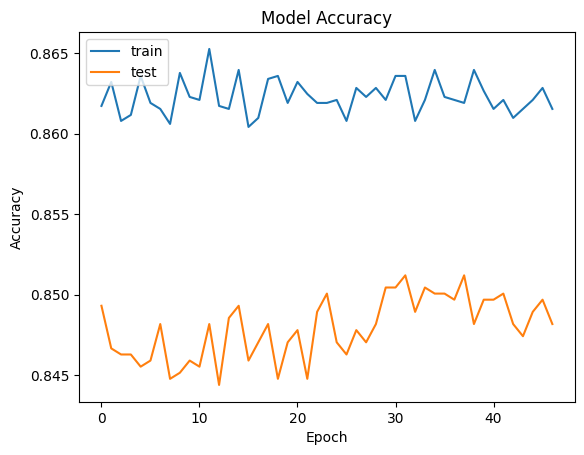

In [43]:
## Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

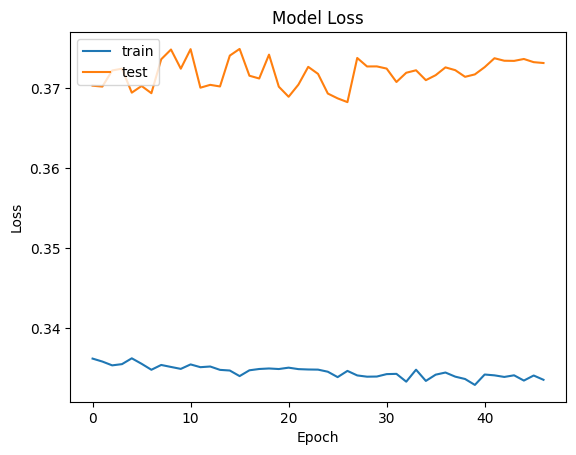

In [44]:
## Summarize for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [45]:
##@ PART 3 Making predictions and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [46]:
## make confusion matrix'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1503,   92],
       [ 201,  204]])

In [48]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8535

In [49]:
## Get the weights

classifier.get_weights()

[array([[ 0.05157726, -0.41119307, -0.14949661, -0.00691646, -0.13359654,
          0.03166595, -0.10266851, -0.19084053,  0.16582857, -0.424175  ,
          0.35607523],
        [-0.12461082, -0.35534918,  1.0756164 ,  0.23180166,  0.9266803 ,
          0.37073478,  0.4883372 , -0.00116949,  0.2715153 , -0.09886925,
         -0.28521067],
        [-0.18974397,  0.4007432 , -0.0478726 , -0.28176916,  0.14745784,
         -0.01256519,  0.06837776, -0.01855428, -0.49036905,  0.31958735,
          0.10165802],
        [-0.81117487, -0.6799591 ,  0.26336753,  0.43585056,  0.03058137,
          0.33657426, -0.18688506,  0.15280882, -0.01932282,  0.54815805,
          0.05132991],
        [-0.04478727,  0.05552516,  0.2754134 ,  0.02582337,  0.40778512,
          1.076758  , -0.9195279 ,  0.9373793 ,  0.32120356, -0.21698473,
          0.605472  ],
        [ 0.28496483, -0.24449086,  0.14485067,  0.27764627,  0.04401387,
          0.01964321, -0.0151653 ,  0.0696949 ,  0.20617959,  0.4938568